In [1]:
import os

In [2]:
## google drive에서 압축된 dataset download
import gdown
url = 'https://drive.google.com/uc?id=1dIR9ANjUsV9dWa0pS9J0c2KUGMfpIRG0'
fname = 'oxford_pet.zip'
gdown.download(url, fname, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1dIR9ANjUsV9dWa0pS9J0c2KUGMfpIRG0
To: /content/oxford_pet.zip
811MB [00:05, 158MB/s]


'oxford_pet.zip'

In [3]:
## 압축풀기
!unzip -q oxford_pet.zip -d oxford_pet

In [4]:
cur_dir = os.getcwd()
data_dir = os.path.join(cur_dir, 'oxford_pet')
image_dir = os.path.join(data_dir, 'images')
bbox_dir = os.path.join(data_dir, 'annotations', 'xmls')
seg_dir = os.path.join(data_dir, 'annotations', 'trimaps')

In [5]:
image_files = [fname for fname in os.listdir(image_dir) if os.path.splitext(fname)[-1] == '.jpg']
print(len(image_files))

7390


In [6]:
bbox_files = [fname for fname in os.listdir(bbox_dir) if os.path.splitext(fname)[-1] == '.xml']
print(len(bbox_files))

3686


In [7]:
seg_files = [fname for fname in os.listdir(seg_dir) if os.path.splitext(fname)[-1] == '.png']
print(len(seg_files))

7390


In [8]:
image_files[:10]

['japanese_chin_181.jpg',
 'British_Shorthair_189.jpg',
 'beagle_179.jpg',
 'miniature_pinscher_31.jpg',
 'Abyssinian_11.jpg',
 'Maine_Coon_31.jpg',
 'Sphynx_213.jpg',
 'Egyptian_Mau_110.jpg',
 'german_shorthaired_72.jpg',
 'Persian_60.jpg']

In [9]:
bbox_files[:10]

['Sphynx_197.xml',
 'chihuahua_167.xml',
 'Bombay_168.xml',
 'Maine_Coon_219.xml',
 'english_cocker_spaniel_123.xml',
 'samoyed_167.xml',
 'english_cocker_spaniel_119.xml',
 'shiba_inu_183.xml',
 'american_bulldog_184.xml',
 'saint_bernard_153.xml']

In [10]:
seg_files[:10]

['Birman_22.png',
 'keeshond_145.png',
 'Abyssinian_68.png',
 'Ragdoll_141.png',
 'pug_146.png',
 'samoyed_13.png',
 'pomeranian_14.png',
 'leonberger_105.png',
 'scottish_terrier_81.png',
 'Maine_Coon_137.png']

In [11]:
import random
import numpy as np
from PIL import Image
import xml.etree.ElementTree as et
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

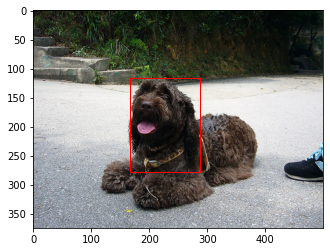

In [14]:
rnd_idx = random.randint(1, len(bbox_files))

bbox_name = bbox_files[rnd_idx]
bbox_path = os.path.join(bbox_dir, bbox_name)
tree = et.parse(bbox_path)

width = float(tree.find('./size/width').text)
height = float(tree.find('./size/height').text)
xmin = float(tree.find('./object/bndbox/xmin').text)
xmax = float(tree.find('./object/bndbox/xmax').text)
ymin = float(tree.find('./object/bndbox/ymin').text)
ymax = float(tree.find('./object/bndbox/ymax').text)

rect_x = xmin
rect_y = ymin
rect_w = xmax-xmin
rect_h = ymax-ymin

fname = os.path.splitext(bbox_name)[0]+'.jpg'
fpath = os.path.join(image_dir, fname)
image = Image.open(fpath)
image = np.array(image)

bbox_name = os.path.splitext(fname)[0]+'.xml'


rect = Rectangle((rect_x, rect_y), rect_w, rect_h, fill=False, color='red')
plt.axes().add_patch(rect)
plt.imshow(image)
plt.show()

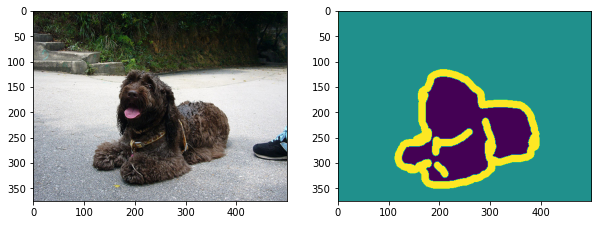

In [15]:
sname = os.path.splitext(bbox_name)[0]+'.png'
spath = os.path.join(seg_dir, sname)
seg = Image.open(spath)
seg = np.array(seg)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(seg)
plt.show()